# UFC Data Analysis
#### By Kody Reichert

## Libraries and ETL

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pylab
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import xgboost
import shap
from xgboost import XGBRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer
import re
from xgboost import XGBClassifier

UFC=pd.read_csv('UFC.csv')
Fighter_df=pd.read_csv('raw_fighter_details.csv')
df=pd.read_csv('preprocessed_data.csv')
UFC.head()


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [205]:
Fighter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 8 columns):
fighter_name    3313 non-null object
Height          3050 non-null object
Weight          3238 non-null object
Reach           1569 non-null object
Stance          2439 non-null object
DOB             2573 non-null object
Height_IN       0 non-null float64
Weight_lbs      3238 non-null float64
dtypes: float64(2), object(6)
memory usage: 207.1+ KB


In [206]:
UFC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


# Cleaning

In [207]:
#null variables
UFC.isnull().sum()

R_fighter                          0
B_fighter                          0
Referee                           23
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_BODY_att                  1265
B_avg_BODY_landed               1265
B_avg_CLINCH_att                1265
B_avg_CLINCH_landed             1265
B_avg_DISTANCE_att              1265
B_avg_DISTANCE_landed           1265
B_avg_GROUND_att                1265
B_avg_GROUND_landed             1265
B_avg_HEAD_att                  1265
B_avg_HEAD_landed               1265
B_avg_KD                        1265
B_avg_LEG_att                   1265
B_avg_LEG_landed                1265
B_avg_PASS                      1265
B_avg_REV                       1265
B

In [208]:
#drop null variables
UFC.dropna(inplace=True)
UFC.isnull().sum()

R_fighter                       0
B_fighter                       0
Referee                         0
date                            0
location                        0
Winner                          0
title_bout                      0
weight_class                    0
no_of_rounds                    0
B_current_lose_streak           0
B_current_win_streak            0
B_draw                          0
B_avg_BODY_att                  0
B_avg_BODY_landed               0
B_avg_CLINCH_att                0
B_avg_CLINCH_landed             0
B_avg_DISTANCE_att              0
B_avg_DISTANCE_landed           0
B_avg_GROUND_att                0
B_avg_GROUND_landed             0
B_avg_HEAD_att                  0
B_avg_HEAD_landed               0
B_avg_KD                        0
B_avg_LEG_att                   0
B_avg_LEG_landed                0
B_avg_PASS                      0
B_avg_REV                       0
B_avg_SIG_STR_att               0
B_avg_SIG_STR_landed            0
B_avg_SIG_STR_

In [209]:
# data types
UFC.dtypes

R_fighter                        object
B_fighter                        object
Referee                          object
date                             object
location                         object
Winner                           object
title_bout                         bool
weight_class                     object
no_of_rounds                      int64
B_current_lose_streak           float64
B_current_win_streak            float64
B_draw                          float64
B_avg_BODY_att                  float64
B_avg_BODY_landed               float64
B_avg_CLINCH_att                float64
B_avg_CLINCH_landed             float64
B_avg_DISTANCE_att              float64
B_avg_DISTANCE_landed           float64
B_avg_GROUND_att                float64
B_avg_GROUND_landed             float64
B_avg_HEAD_att                  float64
B_avg_HEAD_landed               float64
B_avg_KD                        float64
B_avg_LEG_att                   float64
B_avg_LEG_landed                float64


In [210]:
# change object variables to float
UFC['no_of_rounds'] = pd.to_numeric(UFC['no_of_rounds'])
UFC['B_current_lose_streak'] = pd.to_numeric(UFC['B_current_lose_streak'])
UFC['B_current_win_streak'] = pd.to_numeric(UFC['B_current_win_streak'])
UFC['B_draw'] = pd.to_numeric(UFC['B_draw'])
UFC['B_avg_BODY_att'] = pd.to_numeric(UFC['B_avg_BODY_att'])
UFC['B_avg_BODY_landed'] = pd.to_numeric(UFC['B_avg_BODY_landed'])
UFC['B_avg_CLINCH_att'] = pd.to_numeric(UFC['B_avg_CLINCH_att'])
UFC['B_avg_CLINCH_landed'] = pd.to_numeric(UFC['B_avg_CLINCH_landed'])
UFC['B_avg_DISTANCE_att'] = pd.to_numeric(UFC['B_avg_DISTANCE_att'])
UFC['B_avg_DISTANCE_landed'] = pd.to_numeric(UFC['B_avg_DISTANCE_landed'])
UFC['B_avg_DISTANCE_att'] = pd.to_numeric(UFC['B_avg_DISTANCE_att'])
UFC['B_avg_GROUND_att'] = pd.to_numeric(UFC['B_avg_GROUND_att'])
UFC['B_avg_DISTANCE_att'] = pd.to_numeric(UFC['B_avg_DISTANCE_att'])
UFC['B_avg_GROUND_landed'] = pd.to_numeric(UFC['B_avg_GROUND_landed'])
UFC['B_avg_HEAD_att'] = pd.to_numeric(UFC['B_avg_HEAD_att'])
UFC['B_avg_HEAD_landed'] = pd.to_numeric(UFC['B_avg_HEAD_landed'])
UFC['B_avg_KD'] = pd.to_numeric(UFC['B_avg_KD'])
UFC['B_avg_LEG_att'] = pd.to_numeric(UFC['B_avg_LEG_att'])
UFC['B_avg_LEG_landed'] = pd.to_numeric(UFC['B_avg_LEG_landed'])
UFC['B_avg_PASS'] = pd.to_numeric(UFC['B_avg_PASS'])
UFC['B_avg_REV'] = pd.to_numeric(UFC['B_avg_REV'])
UFC['B_avg_SIG_STR_att'] = pd.to_numeric(UFC['B_avg_SIG_STR_att'])
UFC['B_avg_SIG_STR_landed'] = pd.to_numeric(UFC['B_avg_SIG_STR_landed'])
UFC['B_avg_SIG_STR_pct'] = pd.to_numeric(UFC['B_avg_SIG_STR_pct'])
UFC['B_Height_cms'] = pd.to_numeric(UFC['B_Height_cms'])
UFC['B_age'] = pd.to_numeric(UFC['B_age'])
UFC['B_total_time_fought(seconds)'] = pd.to_numeric(UFC['B_total_time_fought(seconds)'])


UFC['no_of_rounds'] = pd.to_numeric(UFC['no_of_rounds'])
UFC['R_current_lose_streak'] = pd.to_numeric(UFC['R_current_lose_streak'])
UFC['R_current_win_streak'] = pd.to_numeric(UFC['R_current_win_streak'])
UFC['R_draw'] = pd.to_numeric(UFC['R_draw'])
UFC['R_avg_BODY_att'] = pd.to_numeric(UFC['R_avg_BODY_att'])
UFC['R_avg_BODY_landed'] = pd.to_numeric(UFC['R_avg_BODY_landed'])
UFC['R_avg_CLINCH_att'] = pd.to_numeric(UFC['R_avg_CLINCH_att'])
UFC['R_avg_CLINCH_landed'] = pd.to_numeric(UFC['R_avg_CLINCH_landed'])
UFC['R_avg_DISTANCE_att'] = pd.to_numeric(UFC['R_avg_DISTANCE_att'])
UFC['R_avg_DISTANCE_landed'] = pd.to_numeric(UFC['R_avg_DISTANCE_landed'])
UFC['R_avg_DISTANCE_att'] = pd.to_numeric(UFC['R_avg_DISTANCE_att'])
UFC['R_avg_GROUND_att'] = pd.to_numeric(UFC['R_avg_GROUND_att'])
UFC['R_avg_DISTANCE_att'] = pd.to_numeric(UFC['R_avg_DISTANCE_att'])
UFC['R_avg_GROUND_landed'] = pd.to_numeric(UFC['R_avg_GROUND_landed'])
UFC['R_avg_HEAD_att'] = pd.to_numeric(UFC['R_avg_HEAD_att'])
UFC['R_avg_HEAD_landed'] = pd.to_numeric(UFC['R_avg_HEAD_landed'])
UFC['R_avg_KD'] = pd.to_numeric(UFC['R_avg_KD'])
UFC['R_avg_LEG_att'] = pd.to_numeric(UFC['R_avg_LEG_att'])
UFC['R_avg_LEG_landed'] = pd.to_numeric(UFC['R_avg_LEG_landed'])
UFC['R_avg_PASS'] = pd.to_numeric(UFC['R_avg_PASS'])
UFC['R_avg_REV'] = pd.to_numeric(UFC['R_avg_REV'])
UFC['R_avg_SIG_STR_att'] = pd.to_numeric(UFC['R_avg_SIG_STR_att'])
UFC['R_avg_SIG_STR_landed'] = pd.to_numeric(UFC['R_avg_SIG_STR_landed'])
UFC['R_Height_cms'] = pd.to_numeric(UFC['R_Height_cms'])
UFC['R_age'] = pd.to_numeric(UFC['R_age'])
UFC['R_total_time_fought(seconds)'] = pd.to_numeric(UFC['R_total_time_fought(seconds)'])
UFC['R_win_by_KO/TKO'] = pd.to_numeric(UFC['R_win_by_KO/TKO'])
UFC['R_win_by_Submission'] = pd.to_numeric(UFC['R_win_by_Submission'])
UFC.dtypes

R_fighter                        object
B_fighter                        object
Referee                          object
date                             object
location                         object
Winner                           object
title_bout                         bool
weight_class                     object
no_of_rounds                      int64
B_current_lose_streak           float64
B_current_win_streak            float64
B_draw                          float64
B_avg_BODY_att                  float64
B_avg_BODY_landed               float64
B_avg_CLINCH_att                float64
B_avg_CLINCH_landed             float64
B_avg_DISTANCE_att              float64
B_avg_DISTANCE_landed           float64
B_avg_GROUND_att                float64
B_avg_GROUND_landed             float64
B_avg_HEAD_att                  float64
B_avg_HEAD_landed               float64
B_avg_KD                        float64
B_avg_LEG_att                   float64
B_avg_LEG_landed                float64


# Exploratory Data Analysis

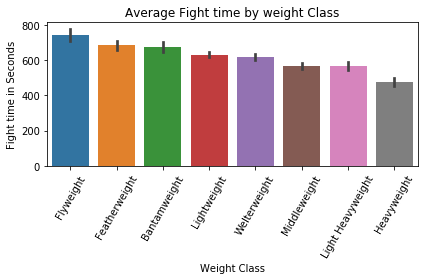

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
time=sns.barplot(x="weight_class",y='R_total_time_fought(seconds)', data=UFC,estimator=mean,order=['Flyweight','Featherweight','Bantamweight','Lightweight','Welterweight','Middleweight','Light Heavyweight','Heavyweight'])
plt.xlabel('Weight Class')
plt.ylabel('Fight time in Seconds')
plt.title('Average Fight time by weight Class')
plt.xticks(rotation=60)
plt.tight_layout()
time

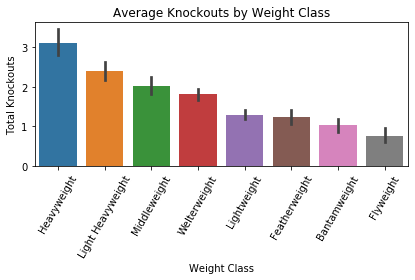

In [212]:
from numpy import mean
ko = sns.barplot(x="weight_class",y='R_win_by_KO/TKO', data=UFC,estimator=mean,order=['Heavyweight','Light Heavyweight','Middleweight','Welterweight','Lightweight','Featherweight','Bantamweight','Flyweight'])
plt.xlabel('Weight Class')
plt.ylabel('Total Knockouts')
plt.title('Average Knockouts by Weight Class')
plt.xticks(rotation=60)
plt.tight_layout()
ko

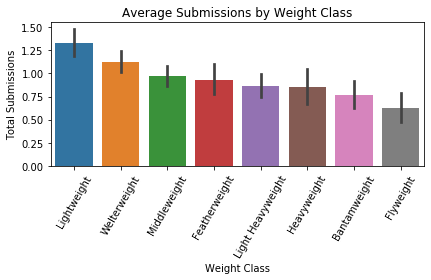

In [213]:
sub = sns.barplot(x="weight_class",y='R_win_by_Submission', data=UFC,estimator=mean,order=['Lightweight','Welterweight','Middleweight','Featherweight','Light Heavyweight','Heavyweight','Bantamweight','Flyweight'])
plt.xlabel('Weight Class')
plt.ylabel('Total Submissions')
plt.title('Average Submissions by Weight Class')
plt.xticks(rotation=60)
plt.tight_layout()
sub

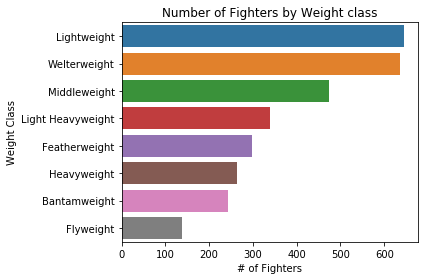

In [214]:
wc = sns.countplot(y="weight_class",order=['Lightweight','Welterweight','Middleweight','Light Heavyweight','Featherweight','Heavyweight','Bantamweight','Flyweight'], data=UFC)
plt.title("Number of Fighters by Weight class")
plt.xlabel("# of Fighters")
plt.ylabel("Weight Class")
plt.tight_layout()
wc

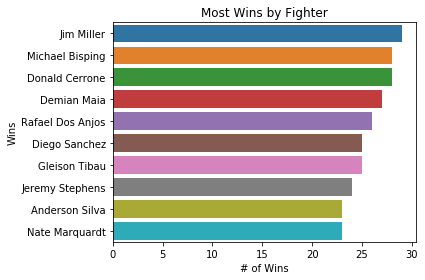

In [215]:
fighters = pd.concat([UFC['R_fighter'], UFC['B_fighter']], ignore_index=True)
names = ' '
for name in fighters:
    name = str(name)
    names = names + name + ' '
values = fighters.value_counts().sort_values(ascending=False).head(10)
labels = values.index
fg=sns.barplot(x=values, y=labels)
plt.title("Most Wins by Fighter")
plt.ylabel("Wins")
plt.xlabel("# of Wins")
plt.tight_layout()
fg

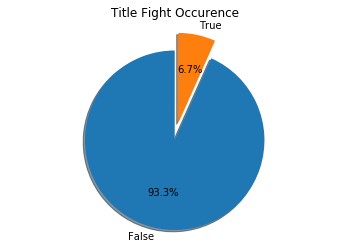

In [216]:

countsT = UFC['title_bout'].value_counts()
labels = 'False' ,'True'
sizes = countsT.values
explode = (0.1, 0.1) 
fig1, title = plt.subplots()
title.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
title.axis('equal')  
plt.title('Title Fight Occurence')
display(title)

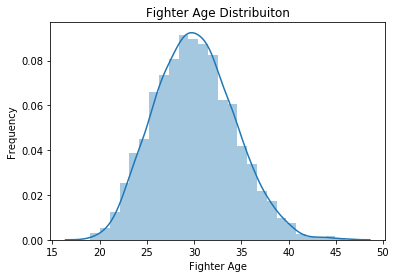

In [217]:
#dist plots of Height across mult weight classes hopefullysns.distplot(fighters['Height'], bins=50)
UFC['R_age'] = pd.to_numeric(UFC['R_age'], errors='coerce')
UFC = UFC.dropna(subset=['R_age'])
d=sns.distplot(UFC['R_age'],bins=26)
plt.title('Fighter Age Distribuiton')
plt.xlabel('Fighter Age')
plt.ylabel('Frequency')
d

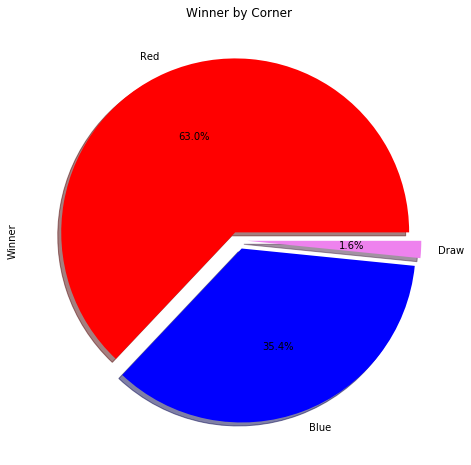

In [218]:
# code obtained from Kaggle user "rizkigt"
colors = ['red', 'blue', 'violet']
plt.figure(figsize=(15,8))
P=UFC['Winner'].value_counts()[:10].plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',colors=colors,shadow=True)
plt.title('Winner by Corner')
P

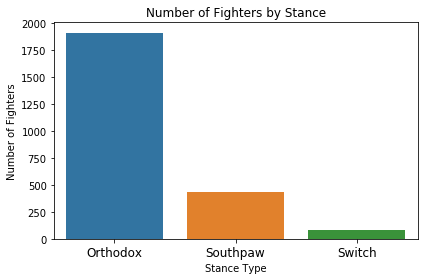

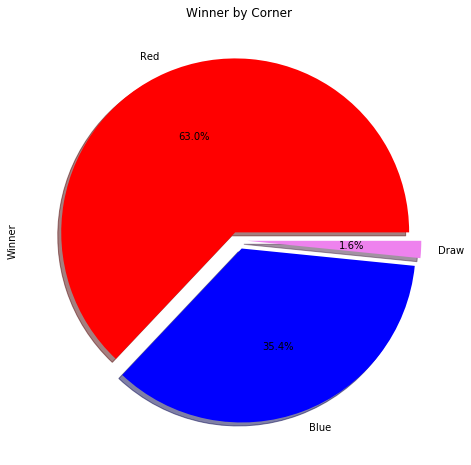

In [219]:
#fighter stances
Stance = sns.countplot(x="Stance",order=['Orthodox','Southpaw','Switch'], data=Fighter_df)
plt.title("Number of Fighters by Stance")
plt.ylabel("Number of Fighters")
plt.xlabel("Stance Type")
plt.xticks(size=12)
plt.tight_layout()
Stance

colors = ['red', 'blue', 'violet']
plt.figure(figsize=(15,8))
P=UFC['Winner'].value_counts()[:10].plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',colors=colors,shadow=True)
plt.title('Winner by Corner')
P

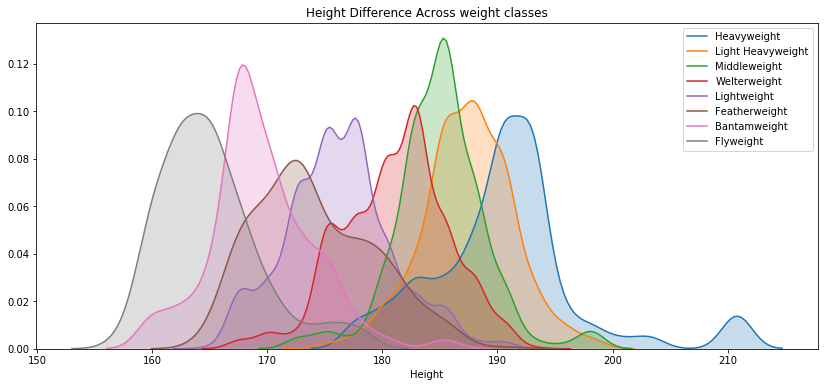

In [220]:
target_0 = UFC.loc[UFC['weight_class'] == 'Heavyweight']
target_1 = UFC.loc[UFC['weight_class'] == 'Light Heavyweight']
target_2 = UFC.loc[UFC['weight_class'] == 'Middleweight']
target_3 = UFC.loc[UFC['weight_class'] == 'Welterweight']
target_4 = UFC.loc[UFC['weight_class'] == 'Lightweight']
target_5 = UFC.loc[UFC['weight_class'] == 'Featherweight']
target_6 = UFC.loc[UFC['weight_class'] == 'Bantamweight']
target_7 = UFC.loc[UFC['weight_class'] == 'Flyweight']

hw=target_0.R_Height_cms
lhw=target_1.R_Height_cms
mw=target_2.R_Height_cms
ww=target_3.R_Height_cms
lw=target_4.R_Height_cms
fw=target_5.R_Height_cms
bw=target_6.R_Height_cms
fly=target_7.R_Height_cms


fig, ax = plt.subplots(figsize=(14, 6))
a=sns.kdeplot(hw, shade=True, label='Heavyweight')
b=sns.kdeplot(lhw, shade=True, label='Light Heavyweight')
c=sns.kdeplot(mw, shade=True, label='Middleweight')
d=sns.kdeplot(ww, shade=True, label='Welterweight')
e=sns.kdeplot(lw, shade=True, label='Lightweight')
f=sns.kdeplot(fw, shade=True, label='Featherweight')
g=sns.kdeplot(bw, shade=True, label='Bantamweight')
h=sns.kdeplot(fly, shade=True, label='Flyweight')

plt.xlabel('Height')
plt.title('Height Difference Across weight classes')
a

Text(0.5, 1.0, 'Reach Difference Across Weight classes')

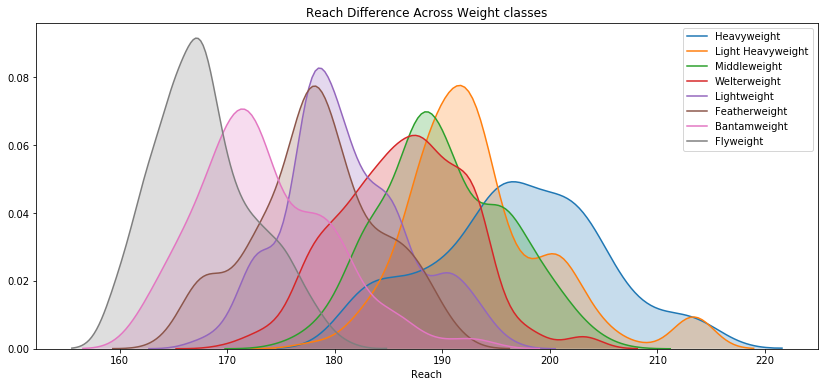

In [221]:
target_0 = UFC.loc[UFC['weight_class'] == 'Heavyweight']
target_1 = UFC.loc[UFC['weight_class'] == 'Light Heavyweight']
target_2 = UFC.loc[UFC['weight_class'] == 'Middleweight']
target_3 = UFC.loc[UFC['weight_class'] == 'Welterweight']
target_4 = UFC.loc[UFC['weight_class'] == 'Lightweight']
target_5 = UFC.loc[UFC['weight_class'] == 'Featherweight']
target_6 = UFC.loc[UFC['weight_class'] == 'Bantamweight']
target_7 = UFC.loc[UFC['weight_class'] == 'Flyweight']

hw=target_0.R_Reach_cms
lhw=target_1.R_Reach_cms
mw=target_2.R_Reach_cms
ww=target_3.R_Reach_cms
lw=target_4.R_Reach_cms
fw=target_5.R_Reach_cms
bw=target_6.R_Reach_cms
fly=target_7.R_Reach_cms


fig, ax = plt.subplots(figsize=(14, 6))
a=sns.kdeplot(hw, shade=True, label='Heavyweight')
b=sns.kdeplot(lhw, shade=True, label='Light Heavyweight')
c=sns.kdeplot(mw, shade=True, label='Middleweight')
d=sns.kdeplot(ww, shade=True, label='Welterweight')
e=sns.kdeplot(lw, shade=True, label='Lightweight')
f=sns.kdeplot(fw, shade=True, label='Featherweight')
g=sns.kdeplot(bw, shade=True, label='Bantamweight')
h=sns.kdeplot(fly, shade=True, label='Flyweight')

plt.xlabel('Reach')
plt.title('Reach Difference Across Weight classes')

In [222]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)
UFC['year'] = UFC['date'].apply(lambda x : x.split('-')[0])
values = UFC['year'].value_counts().sort_values(ascending=False)
labels = values.index
trace = go.Bar(x=labels, y=values)
layout = go.Layout(title='Number of Fights by Year (1993-2019)',
                  xaxis = {'title' : 'Year'},
                  yaxis = {'title' : 'Number of Matches'})
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Random Forest 


In [223]:
df_num = df.select_dtypes(include=[np.float, np.int])


In [224]:
y = df['Winner']
X = df.drop(columns = 'Winner')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [225]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)


In [226]:
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=43, verbose=0,
                       warm_start=False)

In [196]:
y_preds = model.predict(X_test)
accuracy_score(y_test, y_preds)

0.6801112656467315

In [227]:
model.feature_importances_


array([5.71580244e-04, 5.96711178e-04, 2.17835980e-03, 2.70596770e-03,
       0.00000000e+00, 9.76122217e-03, 8.87409942e-03, 8.17720198e-03,
       8.96920324e-03, 1.35461346e-02, 1.35160229e-02, 8.93622486e-03,
       7.13998468e-03, 1.15466719e-02, 1.23804110e-02, 4.45676132e-03,
       8.40753060e-03, 8.51086950e-03, 6.55152205e-03, 3.72302707e-03,
       1.48606483e-02, 1.08811174e-02, 9.77361805e-03, 5.98615716e-03,
       9.06590372e-03, 6.62134377e-03, 6.39278407e-03, 9.54912278e-03,
       8.20942777e-03, 3.23667016e-03, 4.31009703e-03, 7.41825752e-03,
       7.60640244e-03, 9.63771368e-03, 8.07151053e-03, 9.80457989e-03,
       1.19212632e-02, 7.80947835e-03, 7.66450834e-03, 8.59935557e-03,
       8.24807540e-03, 4.43972577e-03, 7.49794093e-03, 7.44026333e-03,
       6.23359321e-03, 3.57457283e-03, 9.74928216e-03, 8.36986655e-03,
       1.01280357e-02, 5.83536497e-03, 7.73136796e-03, 7.17314816e-03,
       8.03743157e-03, 7.71991235e-03, 1.00531799e-02, 6.41926428e-03,
      

# XGBoost


In [228]:
scaler = StandardScaler()
df[list(df_num.columns)] = scaler.fit_transform(df[list(df_num.columns)])

In [229]:
y = df['Winner']
X = df.drop(columns = 'Winner')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
%%time
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.01%
Wall time: 1.61 s


# Logistic Regression

In [231]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [199]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 62, 158],
       [ 80, 419]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

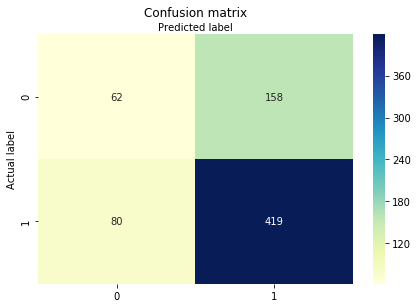

In [200]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [203]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6689847009735744
